### import modules

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gradio as gr
import pickle
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import precision_score,recall_score,f1_score

In [3]:
data=pd.read_csv(r"C:\Users\VISWAPRIYA\Downloads\ground_water_quality_2018_post.csv")
data

,sno,district,mandal,village,lat_gis,long_gis,gwl,season,pH,E.C,...,SO4,Na,K,Ca,Mg,T.H,SAR,Classification,RSCmeq/L,Classification.1
0,1,ADILABAD,Adilabad,Adilabad,19.668300,78.524700,5.09,postmonsoon 2018,8.28,745,...,46.0,49.000000,4.0,48,38.896,279.934211,1.273328,C2S1,-1.198684,P.S.
1,2,ADILABAD,Bazarhatnur,Bazarhatnur,19.458888,78.350833,5.10,postmonsoon 2018,8.29,921,...,68.0,42.000000,5.0,56,63.206,399.893092,0.913166,C3S1,-3.397862,P.S.
2,3,ADILABAD,Gudihatnoor,Gudihatnoor,19.525555,78.512222,4.98,postmonsoon 2018,7.69,510,...,44.0,45.000000,2.0,24,38.896,219.934211,1.319284,C2S1,-0.398684,P.S.
3,4,ADILABAD,Jainath,Jainath,19.730555,78.640000,5.75,postmonsoon 2018,8.09,422,...,35.0,27.000000,1.0,32,19.448,159.967105,0.928155,C2S1,0.000658,P.S.
4,5,ADILABAD,Narnoor,Narnoor,19.495665,78.852654,2.15,postmonsoon 2018,8.21,2321,...,280.0,298.000000,5.0,56,92.378,519.843750,5.682664,C4S2,-4.396875,P.S.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,375,YADADRI,S.Narayanpur,S.Narayanpur,17.144719,78.860010,25.46,postmonsoon 2018,6.95,1950,...,17.0,148.257707,2.0,160,63.206,659.893092,2.509300,C3S1,-4.379774,P.S.
370,376,YADADRI,Thurkapally,Gandamalla,17.733101,78.853831,8.39,postmonsoon 2018,7.45,2330,...,37.0,175.275418,28.0,120,111.826,759.810855,2.764652,C4S1,-4.799978,P.S.
371,377,YADADRI,Valigonda,T. somaram,17.399953,78.952290,21.21,postmonsoon 2018,7.26,1275,...,11.0,147.248057,3.0,64,38.896,319.934211,3.579245,C3S1,-0.721993,P.S.
372,378,YADADRI,Valigonda,Vemulakonda,17.347782,79.143433,4.54,postmonsoon 2018,7.27,5440,...,43.0,597.854463,6.0,424,92.378,1439.843750,6.850306,C4S2,-20.030750,P.S.


In [4]:
print(data.to_string())

     sno           district              mandal                village    lat_gis   long_gis     gwl             season     pH   E.C      TDS  CO3        HCO3    Cl      F        NO3      SO4          Na       K   Ca       Mg          T.H        SAR Classification  RSCmeq/L   Classification.1
0      1           ADILABAD            Adilabad               Adilabad  19.668300  78.524700   5.090  postmonsoon 2018    8.28   745   476.80    0  220.000000    60  0.440   42.276818   46.00   49.000000    4.00   48   38.896   279.934211   1.273328           C2S1   -1.198684             P.S.
1      2           ADILABAD         Bazarhatnur            Bazarhatnur  19.458888  78.350833   5.100  postmonsoon 2018    8.29   921   589.44    0  230.000000    80  0.560  100.659091   68.00   42.000000    5.00   56   63.206   399.893092   0.913166           C3S1   -3.397862             P.S.
2      3           ADILABAD         Gudihatnoor            Gudihatnoor  19.525555  78.512222   4.980  postmonsoon 2018

### Performing Exploratory Data Analysis(EDA)|

In [6]:
data.shape

(374, 26)

In [7]:
data.isna().sum()

sno                 0
district            0
mandal              0
village             0
lat_gis             0
long_gis            0
gwl                 3
season              0
pH                  0
E.C                 0
TDS                 0
CO3                 0
HCO3                0
Cl                  0
F                   0
NO3                 0
SO4                 0
Na                  0
K                   0
Ca                  0
Mg                  0
T.H                 0
SAR                 0
Classification      0
RSCmeq/L            0
Classification.1    0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sno               374 non-null    int64  
 1   district          374 non-null    object 
 2   mandal            374 non-null    object 
 3   village           374 non-null    object 
 4   lat_gis           374 non-null    float64
 5   long_gis          374 non-null    float64
 6   gwl               371 non-null    float64
 7   season            374 non-null    object 
 8   pH                374 non-null    float64
 9   E.C               374 non-null    int64  
 10  TDS               374 non-null    float64
 11  CO3               374 non-null    int64  
 12  HCO3              374 non-null    float64
 13  Cl                374 non-null    int64  
 14  F                 374 non-null    float64
 15  NO3               374 non-null    float64
 16  SO4               374 non-null    float64
 1

In [9]:
data.describe()

,sno,lat_gis,long_gis,gwl,pH,E.C,TDS,CO3,HCO3,Cl,F,NO3,SO4,Na,K,Ca,Mg,T.H,SAR,RSCmeq/L
count,374.000000,374.000000,374.000000,371.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,189.072193,17.701195,78.790172,12.074340,7.893182,1310.601604,838.785027,7.058824,277.676970,187.005348,1.237570,73.766746,44.068182,122.495842,7.832005,73.540107,50.480107,391.200592,2.899550,-2.129246
std,109.473013,0.852885,0.818041,8.533991,0.453799,761.346975,487.262064,18.478645,125.746737,175.897896,0.824399,85.955538,54.500824,103.606183,20.979184,55.003215,35.990466,237.068468,3.106553,4.406282
min,1.000000,15.896441,77.444000,0.570000,6.600000,212.000000,135.680000,0.000000,30.000000,10.000000,0.070000,0.442900,1.000000,5.076154,0.160000,8.000000,4.862000,39.991776,0.201487,-30.870545
25%,94.250000,17.133500,78.185767,5.115000,7.580000,766.250000,490.400000,0.000000,186.523010,60.000000,0.692250,20.630081,15.000000,58.076763,1.932500,40.000000,24.310000,239.936266,1.495094,-3.821711
50%,189.500000,17.632227,78.583022,10.000000,7.920000,1173.500000,751.040000,0.000000,263.842574,140.000000,1.060000,46.403841,24.000000,96.697517,3.000000,56.000000,43.758000,339.930099,2.133858,-1.260949
75%,283.750000,18.352612,79.343660,16.575000,8.217500,1666.250000,1066.400000,0.000000,353.548878,260.000000,1.545000,101.066760,43.562500,153.622703,5.990000,96.000000,63.206000,499.923931,3.339268,0.014516
max,379.000000,19.730555,80.920000,43.170000,10.440000,5440.000000,3481.600000,100.000000,970.588963,1500.000000,4.970000,735.214000,453.000000,714.800195,213.700000,488.000000,228.514000,2099.638158,31.079547,17.412602


In [10]:
data.head()

,sno,district,mandal,village,lat_gis,long_gis,gwl,season,pH,E.C,...,SO4,Na,K,Ca,Mg,T.H,SAR,Classification,RSCmeq/L,Classification.1
0,1,ADILABAD,Adilabad,Adilabad,19.668300,78.524700,5.09,postmonsoon 2018,8.28,745,...,46.0,49.0,4.0,48,38.896,279.934211,1.273328,C2S1,-1.198684,P.S.
1,2,ADILABAD,Bazarhatnur,Bazarhatnur,19.458888,78.350833,5.10,postmonsoon 2018,8.29,921,...,68.0,42.0,5.0,56,63.206,399.893092,0.913166,C3S1,-3.397862,P.S.
2,3,ADILABAD,Gudihatnoor,Gudihatnoor,19.525555,78.512222,4.98,postmonsoon 2018,7.69,510,...,44.0,45.0,2.0,24,38.896,219.934211,1.319284,C2S1,-0.398684,P.S.
3,4,ADILABAD,Jainath,Jainath,19.730555,78.640000,5.75,postmonsoon 2018,8.09,422,...,35.0,27.0,1.0,32,19.448,159.967105,0.928155,C2S1,0.000658,P.S.
4,5,ADILABAD,Narnoor,Narnoor,19.495665,78.852654,2.15,postmonsoon 2018,8.21,2321,...,280.0,298.0,5.0,56,92.378,519.843750,5.682664,C4S2,-4.396875,P.S.


In [11]:
data.tail()

,sno,district,mandal,village,lat_gis,long_gis,gwl,season,pH,E.C,...,SO4,Na,K,Ca,Mg,T.H,SAR,Classification,RSCmeq/L,Classification.1
369,375,YADADRI,S.Narayanpur,S.Narayanpur,17.144719,78.860010,25.46,postmonsoon 2018,6.95,1950,...,17.0,148.257707,2.0,160,63.206,659.893092,2.509300,C3S1,-4.379774,P.S.
370,376,YADADRI,Thurkapally,Gandamalla,17.733101,78.853831,8.39,postmonsoon 2018,7.45,2330,...,37.0,175.275418,28.0,120,111.826,759.810855,2.764652,C4S1,-4.799978,P.S.
371,377,YADADRI,Valigonda,T. somaram,17.399953,78.952290,21.21,postmonsoon 2018,7.26,1275,...,11.0,147.248057,3.0,64,38.896,319.934211,3.579245,C3S1,-0.721993,P.S.
372,378,YADADRI,Valigonda,Vemulakonda,17.347782,79.143433,4.54,postmonsoon 2018,7.27,5440,...,43.0,597.854463,6.0,424,92.378,1439.843750,6.850306,C4S2,-20.030750,P.S.
373,379,YADADRI,Y.Gutta,Mallapuram,17.633555,78.911638,30.15,postmonsoon 2018,7.20,1745,...,14.0,163.837039,4.0,152,34.034,519.942434,3.123968,C3S1,-2.707125,P.S.


In [12]:
# plot

In [13]:
data["district"].value_counts()

district
NALGONDA             37
NIZAMABAD            23
KAMAREDDY            21
RANGAREDDY           19
MEDAK                19
VIKARABAD            16
KHAMMAM              15
BHADRADRI            15
JAGITYAL             14
YADADRI              13
NAGARKURNOOL         12
MAHABUBNAGAR         12
JOGULAMBA(GADWAL)    11
SANGAREDDY           11
NIRMAL               11
WARANGAL (R)         11
NARAYANPET           10
ADILABAD              9
MAHABUBABAD           8
SIDDIPET              8
HYDERABAD             8
MEDCHAL               7
JANGAON               7
SURYAPET              7
WANAPARTHY            7
WARANGAL (U)          7
MANCHERIAL            6
KUMURAM BHEEM         6
SIRCILLA              6
PEDDAPALLY            5
KARIMNAGAR            5
BHUPALPALLY           4
MULUGU                4
Name: count, dtype: int64

In [14]:
data["mandal"].value_counts()

mandal
Anumula          4
Chandur          4
Shivampet        3
Nalgonda         3
Nakrekal         3
                ..
Dhantalapally    1
Tiryani          1
Rebbena          1
Kowthala         1
Y.Gutta          1
Name: count, Length: 314, dtype: int64

### Dropping columns that are not required

In [16]:
drop_cols = ['sno', 'district', 'mandal', 'village', 'lat_gis', 'long_gis', 'season', 'Classification']
df_clean = data.drop(columns=drop_cols)
df_clean

,gwl,pH,E.C,TDS,CO3,HCO3,Cl,F,NO3,SO4,Na,K,Ca,Mg,T.H,SAR,RSCmeq/L,Classification.1
0,5.09,8.28,745,476.80,0,220.000000,60,0.44,42.276818,46.0,49.000000,4.0,48,38.896,279.934211,1.273328,-1.198684,P.S.
1,5.10,8.29,921,589.44,0,230.000000,80,0.56,100.659091,68.0,42.000000,5.0,56,63.206,399.893092,0.913166,-3.397862,P.S.
2,4.98,7.69,510,326.40,0,200.000000,30,0.66,41.471545,44.0,45.000000,2.0,24,38.896,219.934211,1.319284,-0.398684,P.S.
3,5.75,8.09,422,270.08,0,160.000000,10,0.58,10.669864,35.0,27.000000,1.0,32,19.448,159.967105,0.928155,0.000658,P.S.
4,2.15,8.21,2321,1485.44,0,300.000000,340,2.56,128.843636,280.0,298.000000,5.0,56,92.378,519.843750,5.682664,-4.396875,P.S.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,25.46,6.95,1950,1248.00,0,440.904409,220,1.12,19.709050,17.0,148.257707,2.0,160,63.206,659.893092,2.509300,-4.379774,P.S.
370,8.39,7.45,2330,1491.20,0,519.811959,270,1.80,1.993050,37.0,175.275418,28.0,120,111.826,759.810855,2.764652,-4.799978,P.S.
371,21.21,7.26,1275,816.00,0,283.834542,90,2.80,29.231400,11.0,147.248057,3.0,64,38.896,319.934211,3.579245,-0.721993,P.S.
372,4.54,7.27,5440,3481.60,0,438.306255,1500,0.78,167.194750,43.0,597.854463,6.0,424,92.378,1439.843750,6.850306,-20.030750,P.S.


### Label encoding

In [18]:
le = LabelEncoder()
y = le.fit_transform(df_clean['Classification.1'])
X = df_clean.drop(columns=['Classification.1'])


### Boxplot of TDS by Water Quality Classification

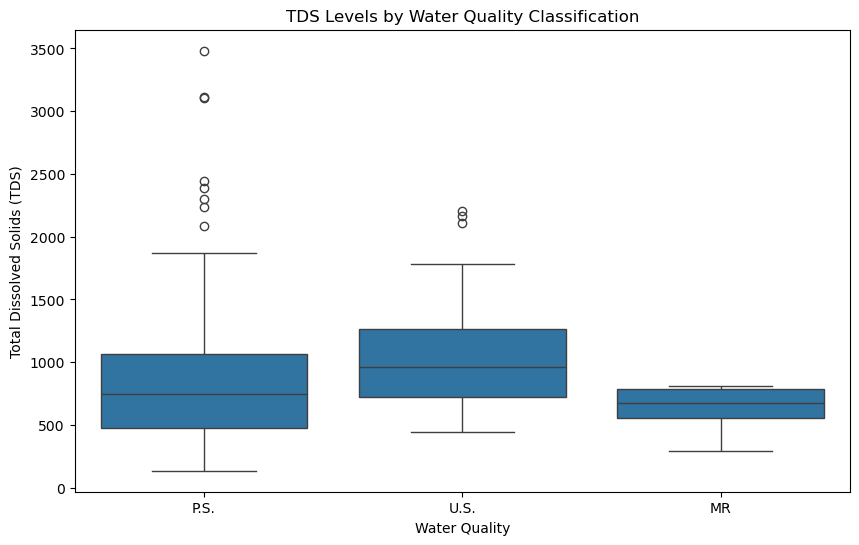

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10, 6))
sns.boxplot(x=data["Classification.1"], y=data["TDS"])
plt.title("TDS Levels by Water Quality Classification")
plt.xlabel("Water Quality")
plt.ylabel("Total Dissolved Solids (TDS)")
plt.show()

### Distribution of pH Levels

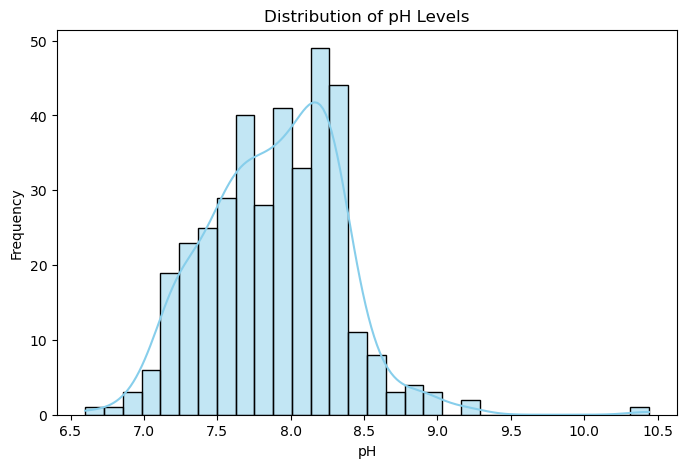

In [22]:
plt.figure(figsize=(8, 5))
sns.histplot(df_clean["pH"], kde=True, bins=30, color='skyblue')
plt.title("Distribution of pH Levels")
plt.xlabel("pH")
plt.ylabel("Frequency")
plt.show()

### Correlation Heatmap

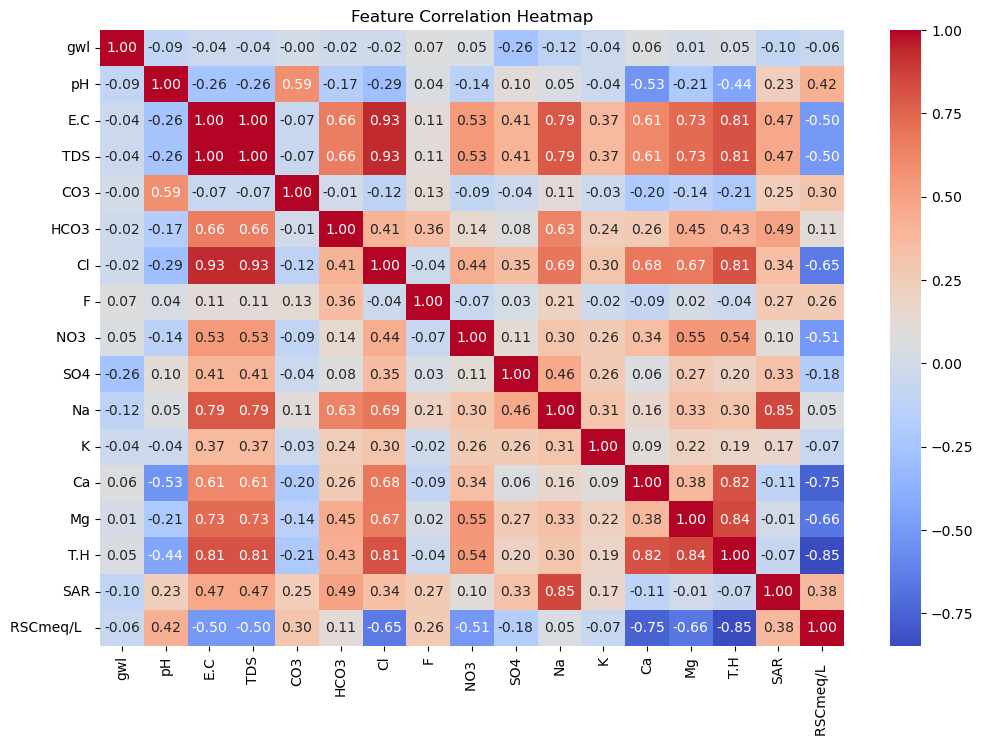

In [24]:
plt.figure(figsize=(12, 8))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [25]:
X_filled = X.fillna(X.mean(numeric_only=True))
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_filled)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Logistic Regression

In [28]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_predicted=lr.predict(X_test)
y_predicted

array([1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1])

In [29]:
lr.score(X_test,y_test)

0.9733333333333334

In [30]:
print("\n📊 Logistic Regression Metrics:")
print("Accuracy :", accuracy_score(y_test, y_predicted))
print("Precision:", precision_score(y_test, y_predicted, average='weighted', zero_division=0))
print("Recall   :", recall_score(y_test, y_predicted, average='weighted'))
print("F1 Score :", f1_score(y_test, y_predicted, average='weighted'))


📊 Logistic Regression Metrics:
Accuracy : 0.9733333333333334
Precision: 0.9542857142857143
Recall   : 0.9733333333333334
F1 Score : 0.9622222222222223


Random Forest

In [32]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

In [33]:
rf.score(X_test,y_test)

0.9733333333333334

In [34]:
print("\n📊 Random Forest Metrics:")
print("Accuracy :", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf, average='weighted', zero_division=0))
print("Recall   :", recall_score(y_test, y_pred_rf, average='weighted'))
print("F1 Score :", f1_score(y_test, y_pred_rf, average='weighted'))


📊 Random Forest Metrics:
Accuracy : 0.9733333333333334
Precision: 0.9542857142857143
Recall   : 0.9733333333333334
F1 Score : 0.9622222222222223


In [35]:


svm = SVC()
svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)

In [36]:
svm.score(X_test,y_test)

0.9466666666666667

In [37]:
print("\n📊 Support Vector Machine (SVM) Metrics:")
print("Accuracy :", accuracy_score(y_test, y_pred_svm))
print("Precision:", precision_score(y_test, y_pred_svm, average='weighted', zero_division=0))
print("Recall   :", recall_score(y_test, y_pred_svm, average='weighted'))
print("F1 Score :", f1_score(y_test, y_pred_svm, average='weighted'))


📊 Support Vector Machine (SVM) Metrics:
Accuracy : 0.9466666666666667
Precision: 0.918356807511737
Recall   : 0.9466666666666667
F1 Score : 0.93154276578737


Save to pickle

In [45]:

with open("rf.pkl", "wb") as f:
    pickle.dump(rf, f)
    print("Model saved to model.pkl")

Model saved to model.pkl


In [54]:
with open("rf.pkl", "rb") as f:
    loaded_model = pickle.load(f)

GRADIO

In [57]:



with open("rf.pkl", "rb") as f:
    rf = pickle.load(f)
feature_names = ["ph", "ec", "tds", "ca", "mg", "na", "k", "co3", "hco3", "cl", "so4", "no3", "f"
]


def predict_quality(*inputs):
    # Convert inputs to 2D array for model
    features = np.array(inputs).reshape(1, -1)
    # prediction = model.predict(features)[0]
    prediction = "Safe" if sum(inputs) % 2 == 0 else "Unsafe"  # placeholder logic
    return prediction


inputs = [gr.Number(label=feat) for feat in feature_names]

gr.Interface(
    fn=predict_quality,
    inputs=inputs,
    outputs=gr.Text(label="Water Quality"),
    title="Ground Water Quality Predictor",
    description="Enter the values for the chemical parameters to predict water quality."
).launch()

* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.
